In [223]:
# Imports

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [224]:
df = pd.read_csv("mt_fly_pca.csv")

In [225]:
#separate features from targets
x = df.values[0:56,1:15]
labels = df.columns[1:]
labels

Index(['CS_mean', 'CN_mean', 'R_mean', 'I-A', 'IR1', 'I-B1', 'IR2', 'I-C_A',
       'I-B2', 'I-C', 'IR3', 'II-A', 'II-B', 'II-C'],
      dtype='object')

In [226]:
x_scaled = StandardScaler().fit_transform(x)

In [227]:
#PCA training
pca = PCA(n_components=3)
 
pca_features = pca.fit_transform(x_scaled)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

In [228]:
#Explained variance
exp_var_pca = pca.explained_variance_ratio_
#Cumulative variance
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

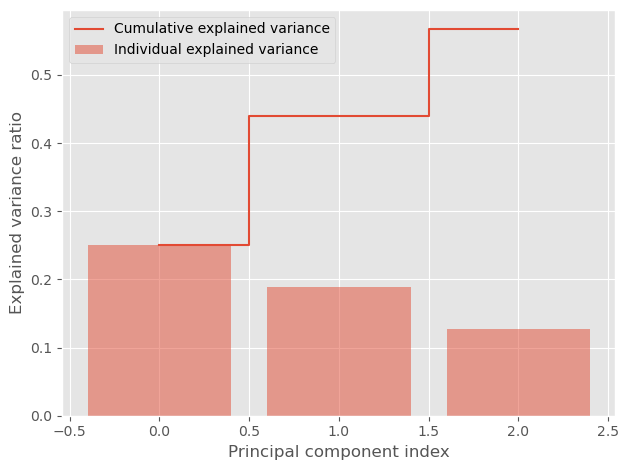

In [218]:
#Plotting explained variance
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [230]:
loadings = pca.components_

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_mat = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=labels)
loadings_mat

,PC1,PC2,PC3
CS_mean,-0.352990,1.769252e-01,-4.172007e-01
CN_mean,0.567052,1.744570e-01,-3.960310e-01
R_mean,-0.011565,2.488689e-02,-8.128802e-01
I-A,-0.000000,-1.462140e-16,0.000000e+00
IR1,-0.000000,-1.462140e-16,-1.497303e-16
I-B1,0.383201,-7.673416e-01,8.489974e-02
IR2,-0.078977,-6.746572e-01,-3.937941e-01
I-C_A,0.152421,-7.433734e-01,5.890305e-02
I-B2,-0.905356,-2.226522e-01,1.071399e-02
I-C,-0.919287,-1.148650e-01,2.913022e-03


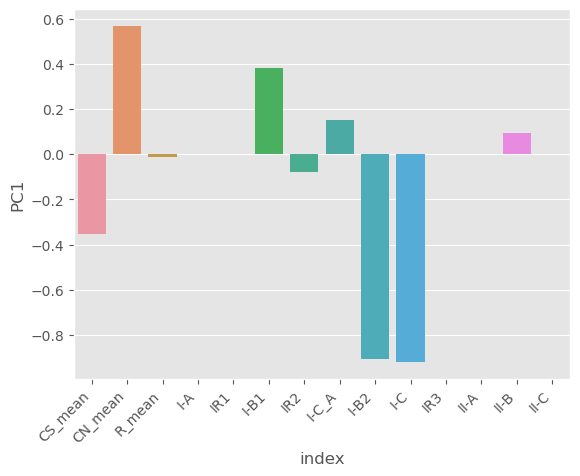

In [237]:
loadings_mat.reset_index(inplace=True)
sns.barplot(data=loadings_mat, x='index', y='PC1')
plt.xticks(rotation=45, ha='right')
plt.show()

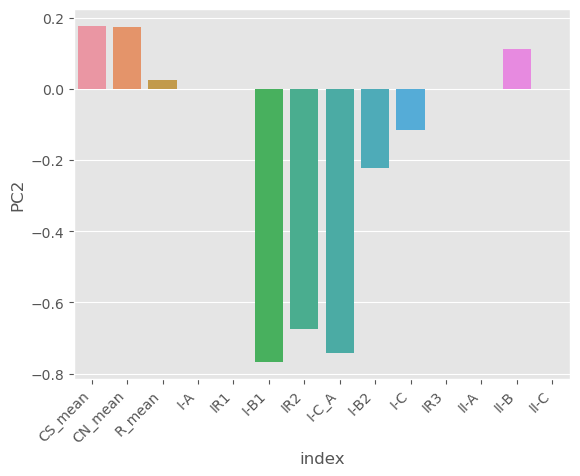

In [238]:
sns.barplot(data=loadings_mat, x='index', y='PC2')
plt.xticks(rotation=45, ha='right')
plt.show()

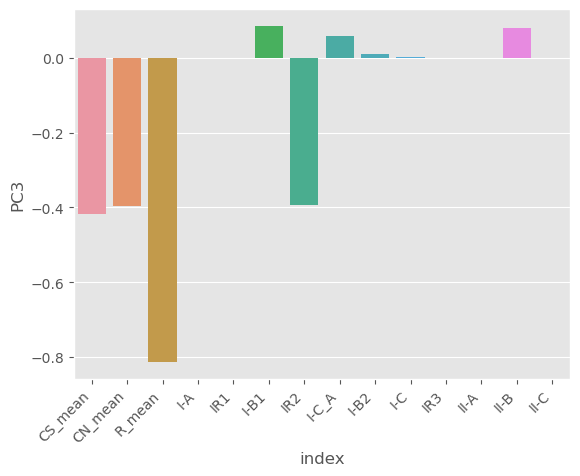

In [239]:
sns.barplot(data=loadings_mat, x='index', y='PC3')
plt.xticks(rotation=45, ha='right')
plt.show()

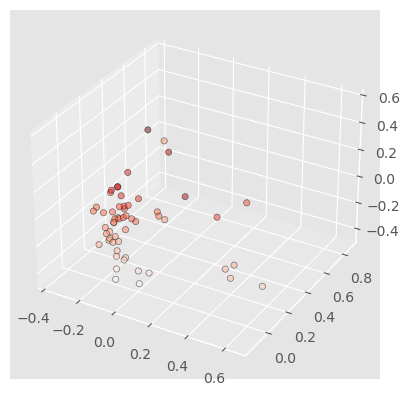

In [242]:
pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
    
# Initialize the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']
 
# Plot 3D scatterplot of PCA
ax.scatter3D(
    xdata, 
    ydata, 
    zdata, 
    c=zdata, 
    cmap='Reds', 
    alpha=0.5,
    edgecolor='black')

KeyError: 56

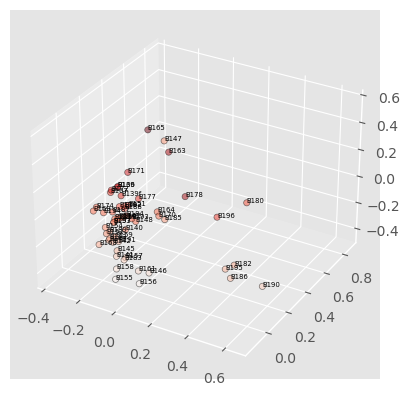

In [244]:
# Initialize the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']

# Plot 3D scatterplot of PCA
ax.scatter3D(
    xdata, 
    ydata, 
    zdata, 
    c=zdata, 
    cmap='Reds', 
    alpha=0.5,
    edgecolor='black')

# Add labels
for (i, label) in enumerate(df['ID']):
    ax.text(xdata[i], ydata[i], zdata[i], label, fontsize=5)

In [245]:
df2 = pd.read_csv("mt_fly_strain.csv")